<a href="https://colab.research.google.com/github/nguyenhuy-vn/Finger-identification-based-on-capacitives-touch-screen/blob/main/save_data_custom_for_thumb_finger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Connect google drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

### Load data from pkl file

In [3]:
df = pd.read_pickle("/content/drive/MyDrive/full_preprocess_data.pkl")

In [4]:
df.head(5)

,Participant,Handedness,Finger,Task,Matrix,Timestamp,BlobCoords,BlobCount,Blobs,BlobImage,BlobImgFlattened
16,3,right,little,TAP,"[[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1]...",1508943194856,"[(10, 14, 13, 17)]",1,"[[[0, 4, 9, 1], [4, 31, 48, 10], [9, 150, 215,...","[[0, 4, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...","[0, 4, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
17,3,right,little,TAP,"[[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1]...",1508943194856,"[(10, 14, 13, 17)]",1,"[[[0, 4, 9, 1], [4, 31, 48, 10], [9, 150, 215,...","[[0, 4, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...","[0, 4, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
18,3,right,little,TAP,"[[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1]...",1508943194926,"[(10, 14, 14, 18)]",1,"[[[1, 17, 27, 5], [6, 105, 140, 27], [18, 161,...","[[1, 17, 27, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 17, 27, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
19,3,right,little,TAP,"[[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1]...",1508943194997,"[(10, 14, 13, 18)]",1,"[[[1, 7, 9, 1], [2, 31, 52, 10], [10, 168, 231...","[[1, 7, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...","[1, 7, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
20,3,right,little,TAP,"[[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1]...",1508943194997,"[(10, 14, 13, 18)]",1,"[[[1, 7, 9, 1], [2, 31, 52, 10], [10, 168, 231...","[[1, 7, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...","[1, 7, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [6]:
len(df)

455709

In [24]:
df = df[df.Finger == 'thumb']
print("the number of thumb finger: ", len(df))

the number of thumb finger:  95571


In [28]:
temp = df['Handedness'].iloc[i]
temp

'right'

In [39]:
left_count = []
right_count = []

for i in range(1, 21):
    count_left = df[(df['Participant'] == i) & (df['Handedness'] == 'left')].shape[0]  # Count occurrences for participant i
    count_right = df[(df['Participant'] == i) & (df['Handedness'] == 'right')].shape[0]
    left_count.append(count_left)
    right_count.append(count_right)

print(left_count)
print(right_count)


[2408, 2180, 1806, 2991, 2125, 2388, 2392, 2530, 2944, 2249, 2238, 2810, 4219, 1827, 2097, 2603, 2621, 4708, 1814, 1947]
[2066, 1726, 1941, 3328, 2269, 2178, 1718, 2161, 2247, 1898, 2045, 1966, 4244, 1828, 2036, 2286, 2009, 2524, 2477, 1727]


In [40]:
from itertools import combinations

participants = list(range(1, 21))

# Initialize variables to store the best combination and smallest difference
best_combination = None
smallest_difference = float('inf')

# Iterate over all combinations of 16 participants
for combination in combinations(participants, 16):
    # Calculate the total left thumb count and right thumb count for the current combination
    total_left = sum(left_count[i - 1] for i in combination)  # i - 1 to adjust for 0-based indexing
    total_right = sum(right_count[i - 1] for i in combination)  # i - 1 to adjust for 0-based indexing

    # Calculate the difference
    difference = abs(total_left - total_right)

    # Check if this is the smallest difference so far
    if difference < smallest_difference:
        smallest_difference = difference
        best_combination = combination

print("Best combination of participants:", best_combination)
print("Smallest difference:", smallest_difference)


Best combination of participants: (1, 2, 3, 4, 5, 6, 8, 10, 11, 13, 14, 15, 16, 17, 19, 20)
Smallest difference: 1824


In [41]:
ptcp_id_train = list(best_combination)
ptcp_id_train

[1, 2, 3, 4, 5, 6, 8, 10, 11, 13, 14, 15, 16, 17, 19, 20]

### Encoder and add label column


In [42]:
Handedness = df['Handedness'].unique()
Finger = df['Finger'].unique()
Handedness, Finger

(array(['right', 'left'], dtype=object), array(['thumb'], dtype=object))

In [43]:
num = 0
dict_data = {}
for i in range (0, len(Handedness)):
  for j in range (0, len(Finger)):
    dict_temp = {Handedness[i] + ' ' + Finger[j]: num}
    dict_data.update(dict_temp)
    num = num + 1

dict_data

{'right thumb': 0, 'left thumb': 1}

In [44]:
def get_feature_column (handedness, finger):
  c = handedness + ' ' + finger
  return dict_data[c]

df['label'] = [get_feature_column(df.Handedness.iloc[i], df.Finger.iloc[i]) for i in range (len(df))]

df['label'].unique()

array([0, 1])

### Split data

In [50]:
ptcp_id_train = np.array(ptcp_id_train)
ptcp_id_train

array([ 1,  2,  3,  4,  5,  6,  8, 10, 11, 13, 14, 15, 16, 17, 19, 20])

In [51]:
def get_data (ones_train, ones_test, ones_train_label, ones_test_label, dframe, i):
  for i in range(len(dframe)):
    temp = int(dframe.iloc[i].Participant)
    if (temp == ptcp_id_train).any():
      arr_train = np.array(dframe.iloc[[i]].Blobs)
      arr_train = arr_train[0][0].astype(np.uint8)
      arr_train = cv2.resize(arr_train, (32, 32), interpolation = cv2.INTER_NEAREST)
      y_temp1 = df.label.iloc[i]
      if( type(ones_train) is str):
        ones_train = [arr_train]
        ones_train_label = [y_temp1]
      else:
        ones_train.extend([arr_train])
        ones_train_label.append(y_temp1)
    else:
      arr_test = np.array(dframe.iloc[[i]].Blobs)
      arr_test = arr_test[0][0].astype(np.uint8)
      arr_test = cv2.resize(arr_test, (32, 32), interpolation=cv2.INTER_NEAREST)
      y_temp2 = df.label.iloc[i]
      if(type(ones_test) is str):
        ones_test = [arr_test]
        ones_test_label = [y_temp2]
      else:
        ones_test.extend([arr_test])
        ones_test_label.append(y_temp2)
  return ones_train, ones_test, ones_train_label, ones_test_label

In [52]:
X_train = ""
X_test = ""
Y_train = ""
Y_test = ""
i = 0
X_train, X_test, Y_train, Y_test = get_data(X_train, X_test, Y_train, Y_test, df, i)

array([[ 10,  10,  10, ...,   5,   5,   5],
       [ 10,  10,  10, ...,   5,   5,   5],
       [ 10,  10,  10, ...,   5,   5,   5],
       ...,
       [  2,   2,   2, ..., 108, 108, 108],
       [  2,   2,   2, ..., 108, 108, 108],
       [  2,   2,   2, ..., 108, 108, 108]], dtype=uint8)
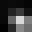

In [53]:
X_train[0]

In [54]:
X_train = np.array(X_train)
X_test = np.array(X_test)

# Normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255

In [55]:
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

Y_train = Y_train.reshape(-1,1)
Y_test  = Y_test.reshape(-1,1)

In [56]:
X_train[0]

array([[0.03921569, 0.03921569, 0.03921569, ..., 0.01960784, 0.01960784,
        0.01960784],
       [0.03921569, 0.03921569, 0.03921569, ..., 0.01960784, 0.01960784,
        0.01960784],
       [0.03921569, 0.03921569, 0.03921569, ..., 0.01960784, 0.01960784,
        0.01960784],
       ...,
       [0.00784314, 0.00784314, 0.00784314, ..., 0.42352942, 0.42352942,
        0.42352942],
       [0.00784314, 0.00784314, 0.00784314, ..., 0.42352942, 0.42352942,
        0.42352942],
       [0.00784314, 0.00784314, 0.00784314, ..., 0.42352942, 0.42352942,
        0.42352942]], dtype=float32)

### One hot encoding


In [58]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(Y_train)
Y_train = encoder.transform(Y_train).toarray()
Y_test = encoder.transform(Y_test).toarray()

In [59]:
Y_train[0]

array([0., 1.])

### Save matrix

In [60]:
label = list((dict_data.keys()))
label

['right thumb', 'left thumb']

In [61]:
label_me = np.array(label)
label_me

array(['right thumb', 'left thumb'], dtype='<U11')

In [62]:
#save data train and test
np.save('/content/drive/MyDrive/data for 2 custom/X_train.npy', X_train)
np.save('/content/drive/MyDrive/data for 2 custom/X_test.npy', X_test)
np.save('/content/drive/MyDrive/data for 2 custom/Y_train.npy', Y_train)
np.save('/content/drive/MyDrive/data for 2 custom/Y_test.npy', Y_test)
np.save('/content/drive/MyDrive/data for 2 custom/label.npy', label_me)

In [63]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((74262, 32, 32), (21309, 32, 32), (74262, 2), (21309, 2))